# Homework 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [305]:
def logistic(r):
    def nextIteration(x):
        return r * x * (1 - x)
    return nextIteration


def trajectory(r, x0, n, k=0):
    x = x0
    l = logistic(r)
    for i in range(n):
        if (i >= k):
            yield x
        x = l(x)

In [306]:
for x in trajectory(2.6, 0.2, 12): print(x)

0.2
0.416
0.6316544
0.604934509298
0.621370746772
0.611699768753
0.617560220317
0.614066945957
0.616170702784
0.614911356318
0.615667988492
0.61521438274


## Q1

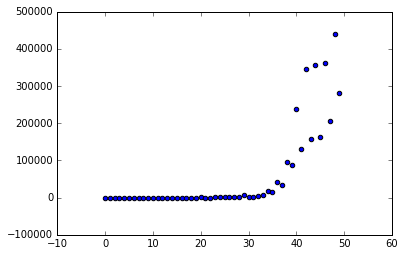

In [307]:
r = 3.72
x0 = 0.2
deltaX0 = 0.000001
n = 50

t1 = trajectory(r, 0.2, n)
t2 = trajectory(r, 0.2 + deltaX0, n)

trajectory1 = np.fromiter(trajectory(r, x0, n), np.float)
trajectory2 = np.fromiter(trajectory(r, x0 + deltaX0, n), np.float)
diff = np.abs((trajectory1 - trajectory2))
N = np.arange(n)

# print(diff[0:5])
# print(diff[499])
# print(diff[500])

plt.scatter(N, diff / 1e-6)
plt.show()

In [21]:
# Average absolute difference for first N iterates

r = 3.72
x0 = 0.2
deltaX0 = 0.000001
n = 500000

t1 = trajectory(r, 0.2, n)
t2 = trajectory(r, 0.2 + deltaX0, n)

trajectory1 = np.fromiter(trajectory(r, x0, n), np.float)
trajectory2 = np.fromiter(trajectory(r, x0 + deltaX0, n), np.float)
diff = np.abs((trajectory1 - trajectory2))

print(np.average(diff))

0.244066605861


# Test 1

In [22]:
# not the logistic map, fyi
def F(r):
    def nextIteration(x):
        return r * x + 3
    return nextIteration


def trajectory(r, x0, n):
    x = x0
    f = F(r)
    for i in range(n):
        yield x
        x = f(x)

r = 3
x0 = 0.2
n =5
X = [x for x in trajectory(r, x0, n)]
print(X)

[0.2, 3.6, 13.8, 44.400000000000006, 136.20000000000002]


# Homework 2.2

In [207]:
def generateBifurcation(r_axis, iterates, x0):
    n, k = iterates
    R = np.arange(*r_axis)
    bifurcation_R = []
    bifurcation_X = []
    for r in R:
        for x in trajectory(r, x0, n, k):
            bifurcation_R.append(r)
            bifurcation_X.append(x)
    return (bifurcation_R, bifurcation_X)

def renderBifurcation(r_axis, iterates, x0, alpha=0.1, xrange=None):
    bif_R, bif_X = generateBifurcation(r_axis, iterates, x0)
    plt.figure(figsize=(20, 12), dpi=100)
    plt.plot(bif_R, bif_X, 'o',color="black", ms=1, mew=0, alpha=alpha)
    if (xrange is not None):
        plt.ylim(xrange)
    plt.show()

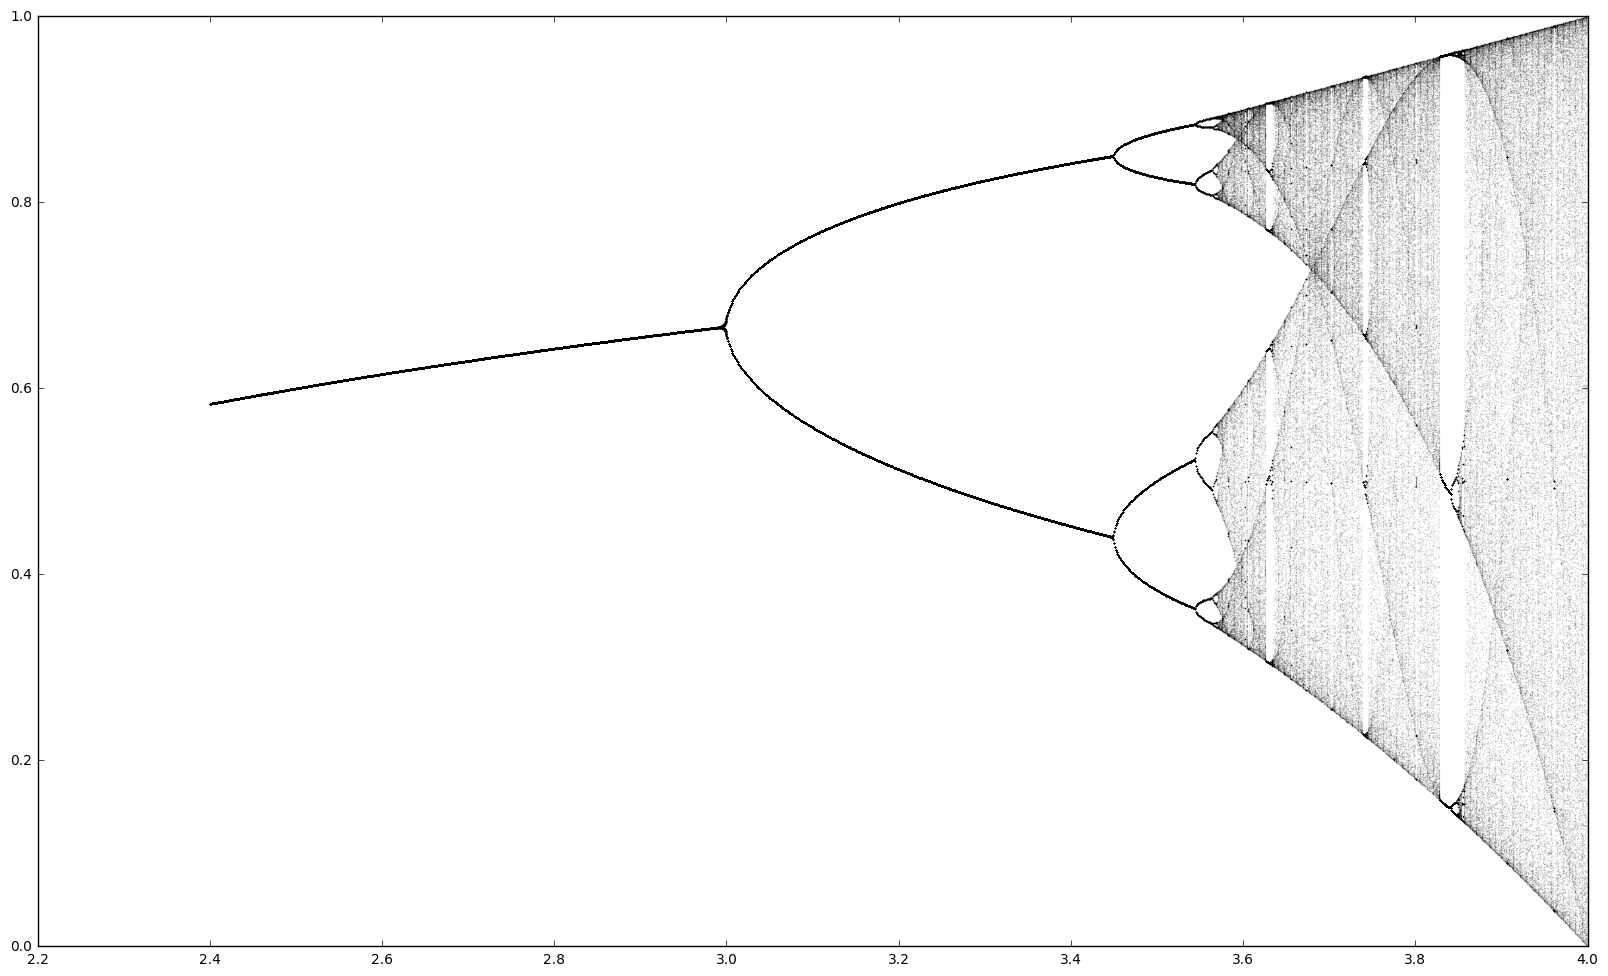

In [337]:
renderBifurcation(
    (2.4, 4, 0.001),
    (1000, 500),
    0.2
)

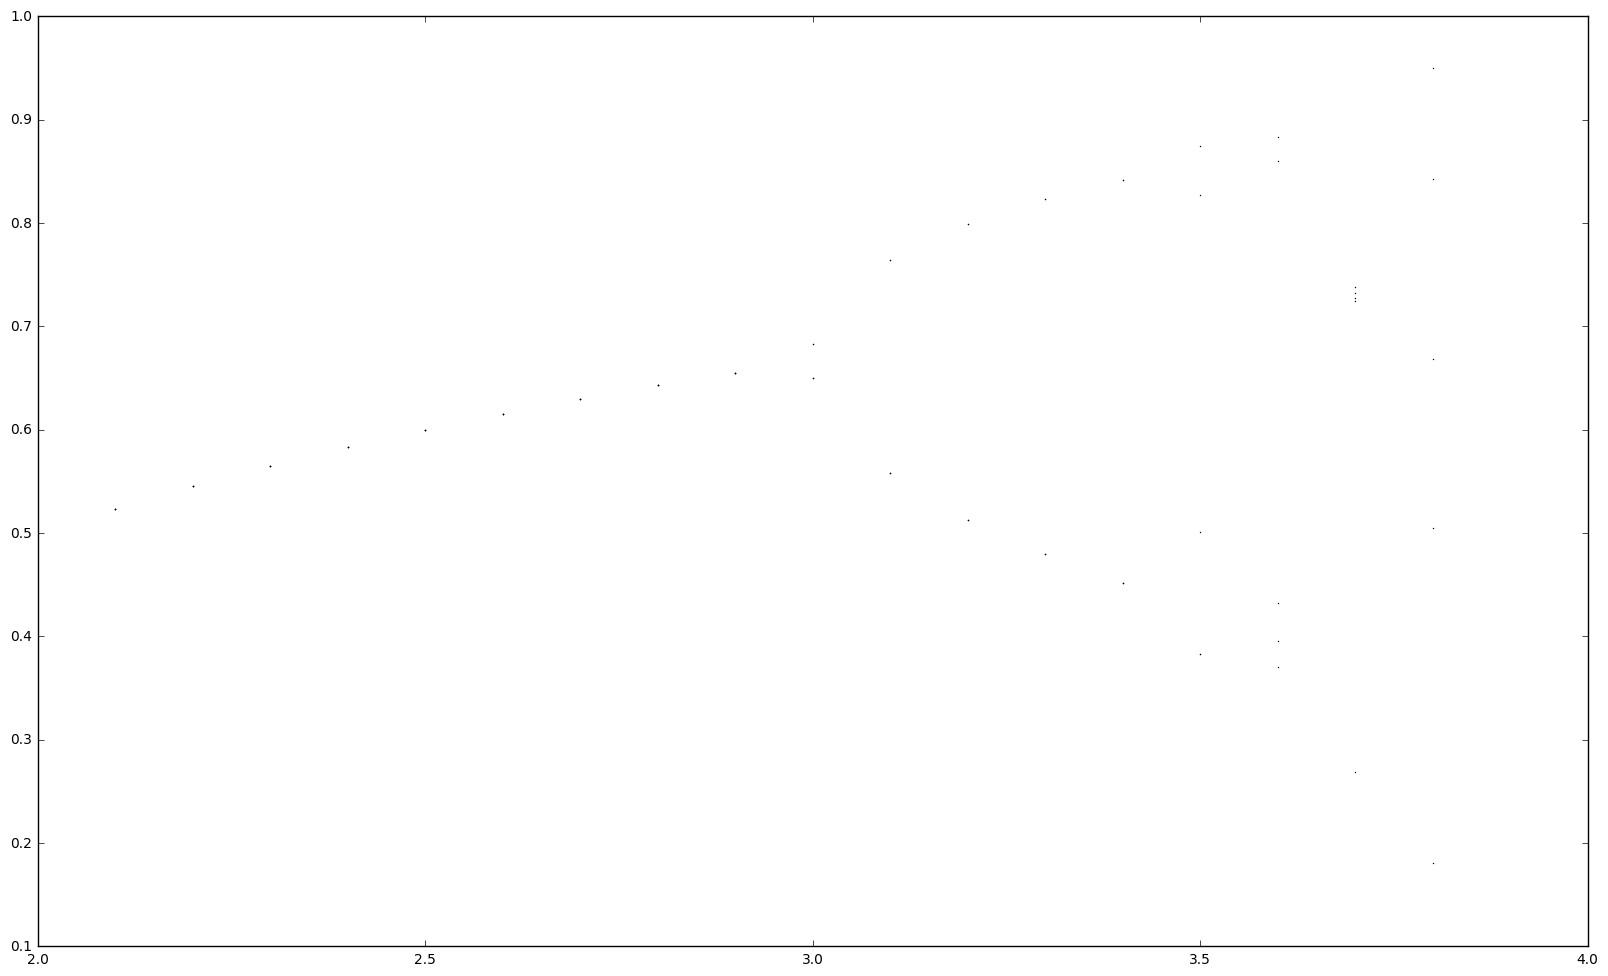

In [328]:
renderBifurcation(
    (2, 3.9, 0.1),
    (200, 195),
    0.2,
    alpha=1
)

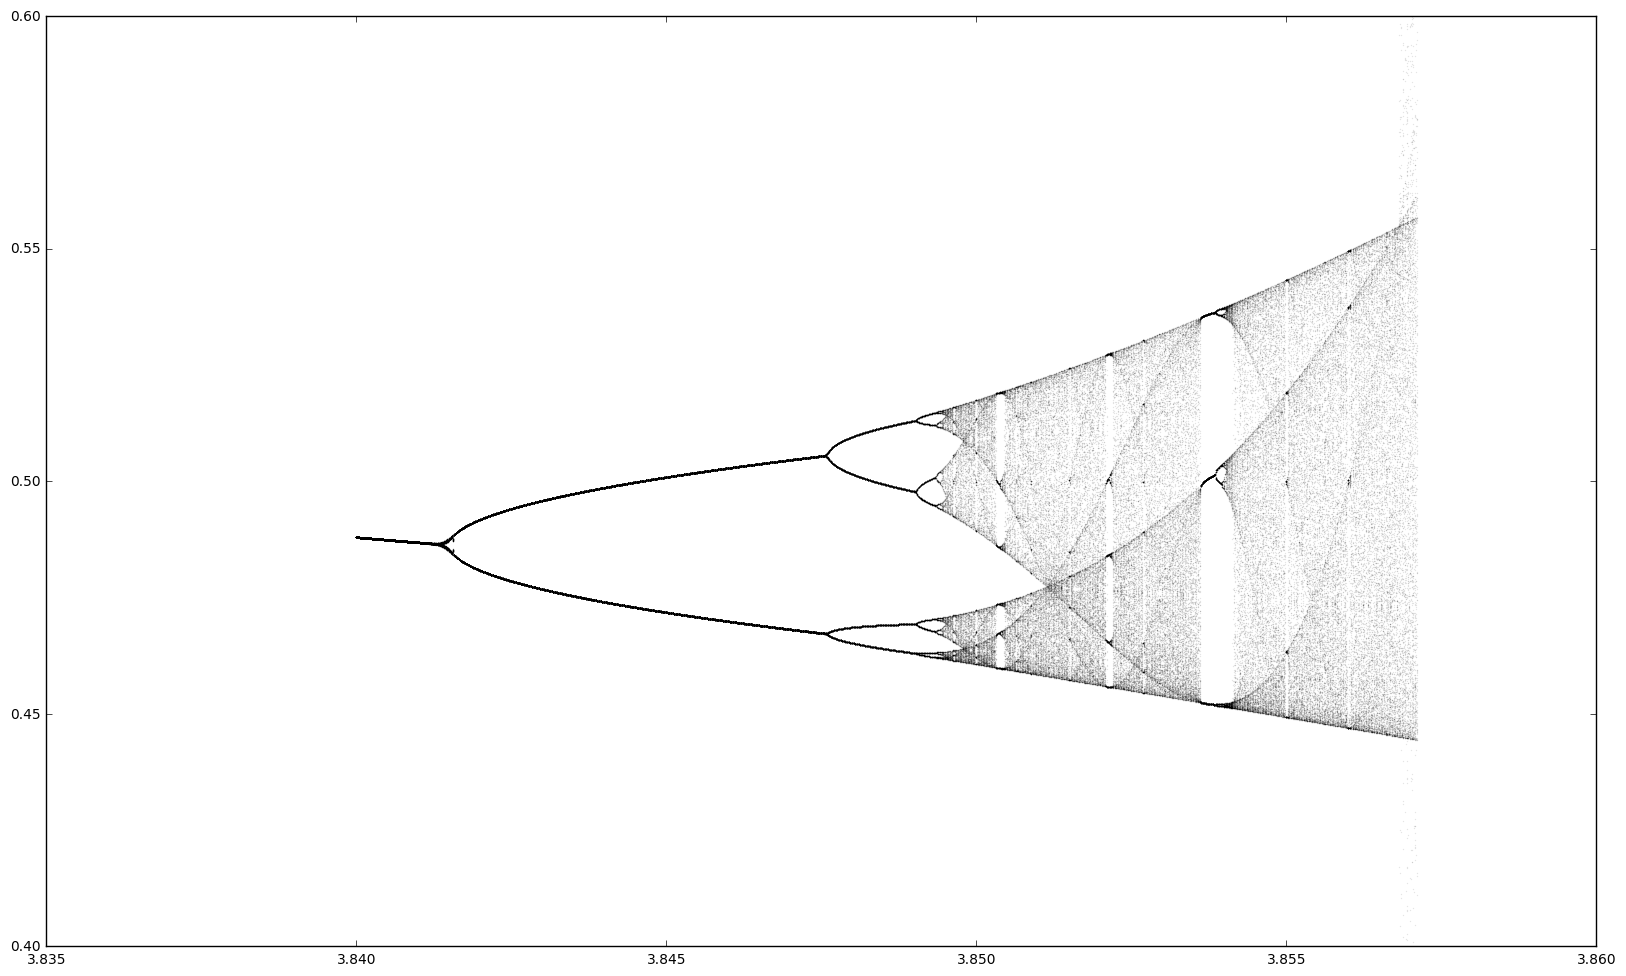

In [333]:
renderBifurcation(
    (3.84, 3.8571, 0.00001),
    (1000, 500),
    0.2,
    #alpha=1,
    xrange=(0.4, 0.6)
)

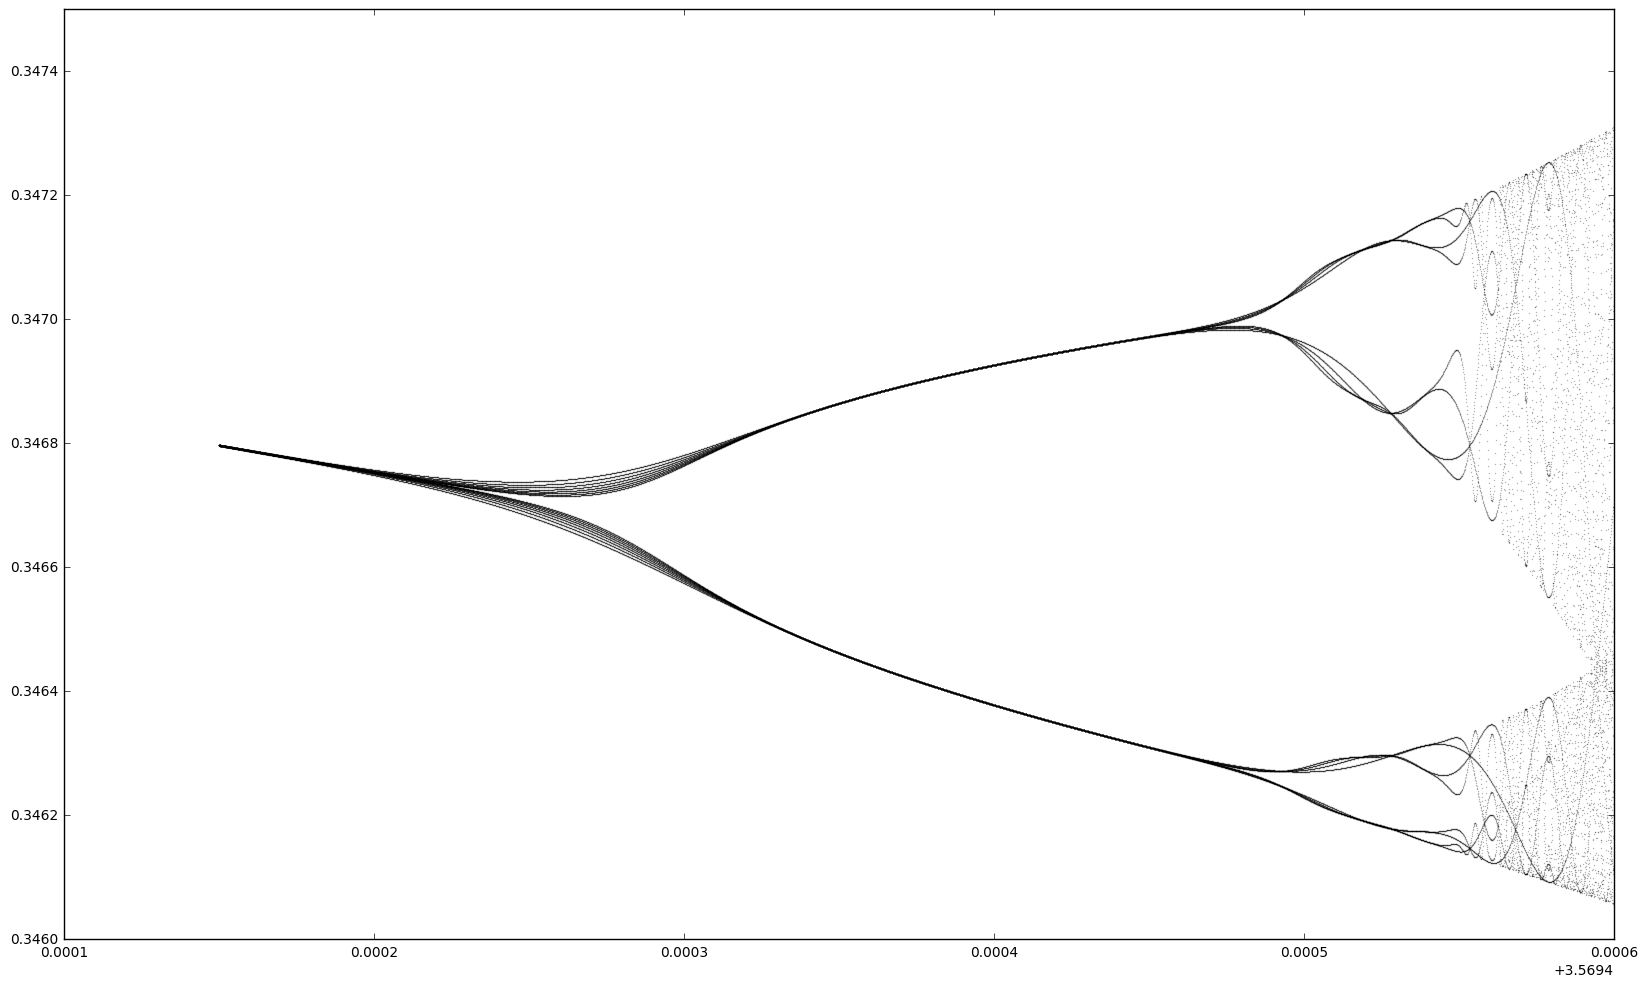

In [308]:
# zooming in...
renderBifurcation(
    (3.56955, 3.57, 0.0000001),
    (1000, 500),
    0.2,
    alpha=0.3,
    xrange=(0.346, 0.3475)
)

# Homework 2.4

In [278]:
# from inspecting the 
b = [
    0, # placeholder
    3.0,
    3.4494897,
    3.5440903,
    3.5644073,
    3.56875,
    3.56969,
]

# according to wolfram mathworld
b = [
    0, # placeholder
    3,
    3.449490,
    3.544090,
    3.564407,
    3.568750,
    3.56969,
    3.56989,
    3.569934,
    3.569943,
    3.5699451,
    3.569945557,
]

def delta(k):
    return (b[k+1] - b[k]) / (b[k+2] - b[k+1])

In [279]:
for bk in range(1, len(b)-2): print((bk, delta(bk)))

(1, 4.751479915433391)
(2, 4.656199242014107)
(3, 4.678102693990326)
(4, 4.620212765957723)
(5, 4.700000000000222)
(6, 4.545454545460968)
(7, 4.888888888921785)
(8, 4.285714285442395)
(9, 4.595185995226002)


#### Q2: trying to find bifurcation points numerically

1. Have a window of `r` that you're going to look for bifurcation points in. (If there are multiple bifurcations, then all bets are off.)
 - `rmin0, rmax0`
2. We're going to pick an `r` value to check out. (We can do this for each r in the range, or do a log search, or whatever.)
3. We will compute the iterates *until* they converge to within some smidget, `epsilon`.
 - If they don't converge, we'll give up after computing `max_iterates` iterates.

In [282]:
rmin0, rmax0 = 2.9, 3.1
k = 1
epsilon = 0.01
max_iterates = 1000

def estimatePeriod(iterates):
    